In [1]:
import h5py
import numpy as np
import pandas as pd

## HDMSpectra matplotlib parameters

In [2]:
from __future__ import print_function

%matplotlib inline
%load_ext autoreload
%autoreload 2



# Plotting defaults
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif' 
mpl.rcParams['xtick.labelsize'] = 26
mpl.rcParams['ytick.labelsize'] = 26
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.frameon'] = False

## Loading HDMSpectra & data files

In [3]:
# Load HDMSpectra
from HDMSpectra import HDMSpectra
data = 'HDMSpectra.hdf5' # location of hdf5 file

### DM Decay Case

<ipython-input-4-558a3356e967>:26: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-4-558a3356e967>:26: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-4-558a3356e967>:26: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-4-558a3356e967>:26: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-4-558a3356e967>:26: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-4-558a3356e967>:26: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-4-558a3356e967>:26: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-4-558a3356e967>:26: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-4

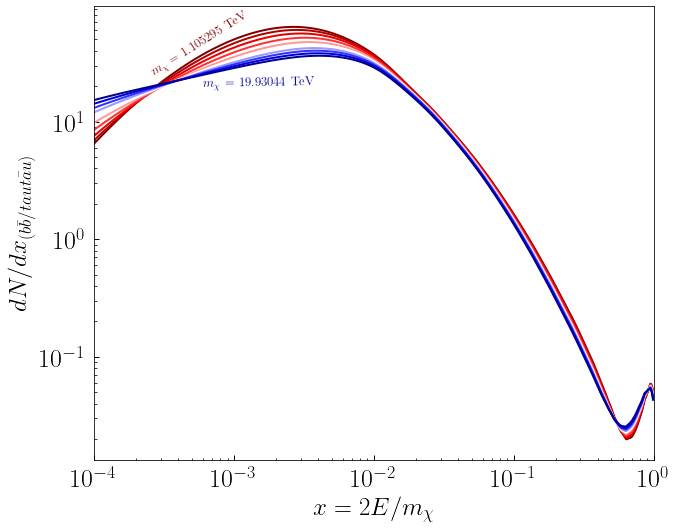

In [4]:
cm = plt.get_cmap('seismic')

# Specify the particles
finalstate = 22 # pdg id of the photon
initialstate1 = 5 # pdg id of the b-quark
initialstate2 = 15 #pdg id of tau leptops

 # dark matter mass in GeV, here 1 EeV
mDM =np.array([1.105295e3 ,1.365418e3,1.783231e3 ,2.517480e3 ,3.757329e3,4.961947e3,7.162629e3 ,9.889380e3,
               13.96135e3 ,19.93044e3])
x = np.logspace(-4.,0.,1000) # Energy fraction values, x = 2E/mDM


## published lifetime limits on bb channel
bb_limits=np.array([1.736478e24,2.516671e24,3.544759e24,5.596723e24,8.836514e24,1.110336e25,1.435571e25,1.803841e25,
                   2.140811e25,2.399746e25])
tautau_calculated_limit=[]

fig, ax = plt.subplots(1, figsize=(9.5,7.5))


# Extract the spectrum using HDMSpectra.spec
for i, m in enumerate(mDM):
    dNdx_bb = HDMSpectra.spec(finalstate, initialstate1, x, m, data)
    dNdx_tautau = HDMSpectra.spec(finalstate, initialstate2, x, m, data)
    dN_ratio=dNdx_bb/dNdx_tautau
    plt.plot(x,dN_ratio, 
             lw=2., c=cm((len(mDM)-i)/float(len(mDM))))
    
    tautau_guess_limit=dN_ratio*bb_limits[i]
    tautau_calculated_limit.append(max(list(tautau_guess_limit)))

plt.text(6.e-4,2*10**(1), r'$m_{\chi}$ = 19.93044 TeV ', fontsize=13,
         color=cm(1./float(len(mDM))),rotation=1)
plt.text(2.5e-4,2.5*10**(1), r'$m_{\chi} =$ 1.105295 TeV', fontsize=13,
         color=cm(1.),rotation=32)



plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
#plt.ylim([1.e-3,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=25)
plt.ylabel(r"$dN/dx_{(b\bar{b}/tau\bar{tau})}$", fontsize=25)
plt.tight_layout()
plt.legend()
plt.show()


# bb_limit=2.54e25 #bb lifetime limit for dark matter decay from paper
# tautau_guess_limit=(dNdx_bb/dNdx_tautau)*bb_limit
# plt.plot(tautau_guess_limit,lw=2,c='b')
# plt.ylabel('lifetime limit for DM decay',fontsize=15)
# plt.axhline(y = 9.22323850679096e+26,linestyle='--',color = 'r')
# print(" ")
# print("## tautau guess limit on lifetime for decay of DM decay = ", max(list(tautau_guess_limit)))
# print("## tautau published limit on lifetime for DM decay = 2.89e+25")

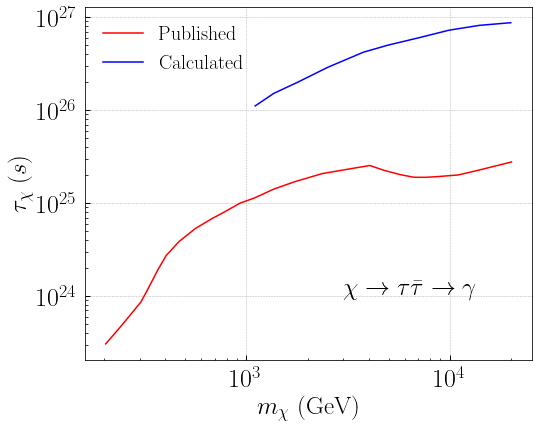

In [5]:
fig, ax = plt.subplots(1, figsize=(8,6.5))

mDM_tau=np.array([203.65183607538947,235.44130512618025,268.92557995268743,303.4846306147935,324.3794643667586,
                  366.1354530326244,403.36099267240763,466.314486894975,562.3141849307289,678.0190664974887,
                  778.9781882767228,933.6004931670695,1092.142131535274 ,1365.3354698695803 ,1727.493834235834 ,
                  2363.926948531222 ,3082.2141101557054,
                  4043.0520610009808 ,4785.762964645227 ,5733.738798008 ,6665.832145701328,7611.065507579596 ,
                  8795.922934816557 ,10994.051927917146 ,13909.354287353968 ,18027.5445362918 ,20094.837789589423])

tautau_published_limit=np.array([ 3.058733747952502e+23, 4.416961113892246e+23, 6.249644906517794e+23, 8.664369681543771e+23, 
                                 1.1301551578302387e+24,1.8840400545979103e+24, 2.7218134213544423e+24, 
                                 3.850734163381701e+24, 5.335424536391879e+24, 6.81094805809418e+24,8.013931323923878e+24, 
                                 1.0023301140870617e+25,1.13184127831558e+25,1.4151017302553075e+25,1.6980473138937927e+25,
                                 2.078288616271341e+25, 
                                 2.2970194770723956e+25,2.53863466954032e+25,2.241650005252031e+25,2.020158940202261e+25, 
                                 1.8972001542950411e+25,1.8949631766817729e+25,1.9316949012605983e+25,2.0084926111878413e+25,
                                 2.266429533274527e+25,2.6098632859794008e+25, 2.772609353021911e+25])

plt.plot(mDM_tau,tautau_published_limit,lw=1.5,c='r',label='Published')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_{\chi}$ (GeV)',fontsize=25)
plt.ylabel(r'$\tau_{\chi} \ (s)$',fontsize=25)


plt.plot(mDM,tautau_calculated_limit,c='b',lw=1.5,label='Calculated')
plt.legend()
plt.text(3.e3,1.e24, r'$\chi \to \tau \bar{\tau} \to \gamma$', fontsize=25)
plt.grid(linestyle = '--', linewidth = 0.5)

### DM annihilation case

<ipython-input-6-b748ef8a9649>:27: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-6-b748ef8a9649>:27: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-6-b748ef8a9649>:27: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-6-b748ef8a9649>:27: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-6-b748ef8a9649>:27: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-6-b748ef8a9649>:27: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-6-b748ef8a9649>:27: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-6-b748ef8a9649>:27: RuntimeWarning: invalid value encountered in true_divide
  dN_ratio=dNdx_bb/dNdx_tautau
<ipython-input-6

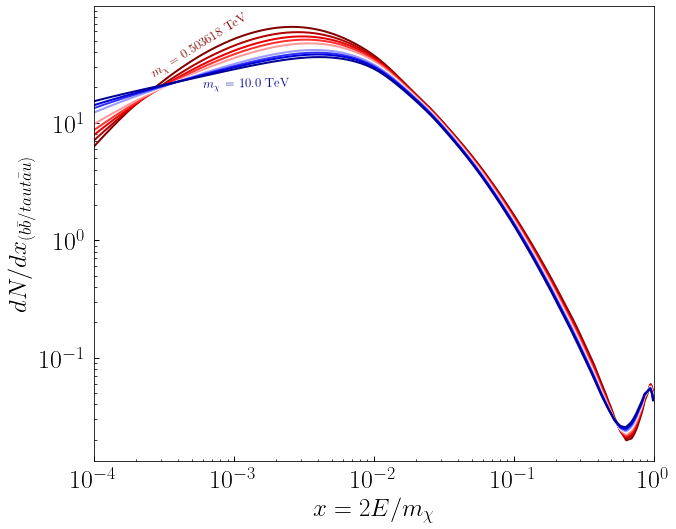

In [6]:
cm = plt.get_cmap('seismic')

# Specify the particles
finalstate = 22 # pdg id of the photon
initialstate1 = 5 # pdg id of the b-quark
initialstate2 = 15 #pdg id of tau leptops

 # dark matter mass in GeV, here 1 EeV
mDM =np.array([0.503618e3 ,0.727038e3 ,1.008575e3 ,1.325480e3 ,1.865110e3,2.762393e3 ,3.821204e3 ,5.346373e3 ,
               6.887659e3,10.0000e3])

x = np.logspace(-4.,0.,1000) # Energy fraction values, x = 2E/mDM


## published <sigmav> limits on bb channel
bb_limits=np.array([8.249703e-24,6.542646e-24,5.812775e-24,5.544158e-24,5.388983e-24,5.703801e-24,6.094407e-24,6.957700e-24,
                    7.868472e-24,9.735452e-24])
tautau_calculated_limit=[]

fig, ax = plt.subplots(1, figsize=(9.5,7.5))


# Extract the spectrum using HDMSpectra.spec
for i, m in enumerate(mDM):
    dNdx_bb = HDMSpectra.spec(finalstate, initialstate1, x, m, data,annihilation=True)
    dNdx_tautau = HDMSpectra.spec(finalstate, initialstate2, x, m, data,annihilation=True)
    dN_ratio=dNdx_bb/dNdx_tautau
    plt.plot(x,dN_ratio, 
             lw=2., c=cm((len(mDM)-i)/float(len(mDM))))
    
    tautau_guess_limit=dN_ratio*bb_limits[i]
    tautau_calculated_limit.append(max(list(tautau_guess_limit)))

plt.text(6.e-4,2*10**(1), r'$m_{\chi}$ = 10.0 TeV ', fontsize=13,
         color=cm(1./float(len(mDM))),rotation=1)
plt.text(2.5e-4,2.5*10**(1), r'$m_{\chi} =$ 0.503618 TeV', fontsize=13,
         color=cm(1.),rotation=32)



plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-4,1.])
#plt.ylim([1.e-3,2.e-1])
plt.xlabel(r"$x = 2E/m_{\chi}$", fontsize=25)
plt.ylabel(r"$dN/dx_{(b\bar{b}/tau\bar{tau})}$", fontsize=25)
plt.tight_layout()
plt.legend()
plt.show()

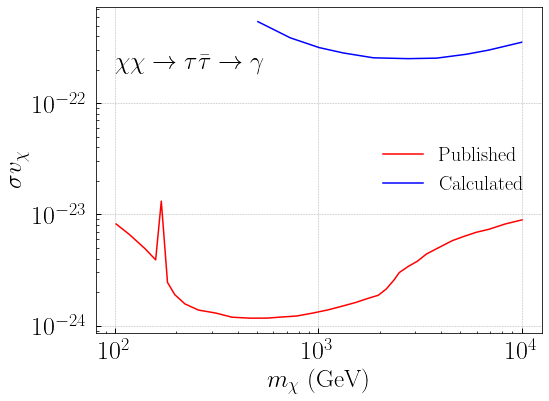

In [10]:
fig, ax = plt.subplots(1, figsize=(8,6))

mDM_tau=np.array([101.01858413411414 ,117.03823715054908 ,140.0044826789685 ,158.10175862908716 ,168.5395256183155 ,
                  180.81655831118476 ,196.48885711548337 ,220.47600006212355 ,257.09286902384395 ,313.54920478327483 ,375.12092434916656 ,460.44620136659927 ,
557.9924774031762 ,654.8995525206965 ,783.5486890039813 ,949.5784781412422 ,1121.6804338284273 ,1283.2142802572848 ,
1525.5423040782725 ,1756.4714096140997 ,1971.179527154754 ,2156.254935241546 ,2358.79097807568 ,2498.9656393661376 ,
2768.8377524429206 ,3067.8179862488914 ,3399.162713539388 ,3888.816215483793 ,4564.5147910095875 ,5188.575633826981 ,
5973.996744025963 ,6922.4259373687655,8282.666583238675 ,10037.83830593805])

tautau_published_limit=np.array([  8.191195368359469e-24, 6.625539562520541e-24, 4.922557728855424e-24, 3.897366074556375e-24,
                                 13.151215202797103e-24, 2.441818860866663e-24, 1.892232656143159e-24, 1.5632426571018353e-24, 1.3768349778000966e-24,
                                 1.2928670488986985e-24, 1.1883520304967167e-24, 1.1644323943733573e-24, 1.1654667955715847e-24, 1.1914159990017953e-24,
                                 1.2180511137466625e-24, 1.2995040667614524e-24, 1.3862397753629218e-24, 1.4785458541736626e-24, 1.611204005705647e-24,
                                 1.755504701987632e-24, 1.872232916109887e-24, 2.1281039743243496e-24 , 2.5784119955882113e-24, 2.993389123568225e-24,
                                 3.402685818812826e-24, 3.786503459534035e-24, 4.396825205113306e-24, 4.998758394327381e-24, 
                                5.806021997715327e-24, 6.3256394260508436e-24, 6.892168661563792e-24, 7.35153530261551e-24, 8.183683111871088e-24,
                                8.918731753954684e-24])

plt.plot(mDM_tau,tautau_published_limit,lw=1.5,c='r',label='Published')

plt.text(1.e2,2.e-22, r'$\chi \chi \to \tau \bar{\tau} \to \gamma$', fontsize=25)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_{\chi}$ (GeV)',fontsize=25)
plt.ylabel(r'$\sigma v_{\chi} $',fontsize=25)

plt.plot(mDM,tautau_calculated_limit,c='b',lw=1.5,label='Calculated')
plt.legend()
plt.grid(linestyle = '--', linewidth = 0.5)

